# User's Guide, Chapter 29: Spanners 1 (Slurs)

In `music21`, a ":class:`~music21.spanner.Spanner`" is a :class:`~music21.base.Music21Object` that denotes a relationship among other elements, such as Notes, Chords, or even Streams, which may or may not be separated in a hierarchy, such as `Note` objects in different measures.  They are used to encode things such as Slurs or lines or Ottava (8va) marks and even things like staff groupings.  Music would be dull if we could not cross the barline, and Spanners are the key to doing so successfully.

## Slurs

Let's create our first spanner, a simple slur between two notes in a measure.  We will use `TinyNotation` to quickly get a short part:

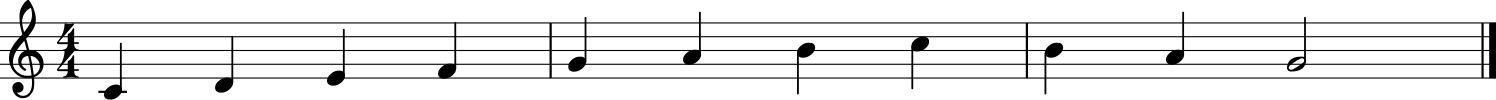

In [1]:
p = converter.parse("tinynotation: 4/4 c4 d e f g a b c' b a g2")
p.show()

Let's put a slur over the first two notes:

In [2]:
c = p.recurse().notes[0]
d = p.recurse().notes[1]
sl1 = spanner.Slur([c, d])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>

Note a couple of things: the notes of the spanner should be enclosed in a grouping container such as a list or tuple and then passed into the Slur, usually when it is created.

If we look at the part, nothing has changed:

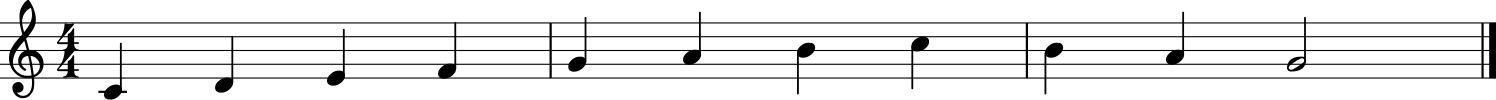

In [3]:
p.show()

Why not?  Well, we have a slur, but it's not part of the part yet.  So let's put it into the first measure.  By convention we put spanners at the beginning of a Stream, at offset 0.0.

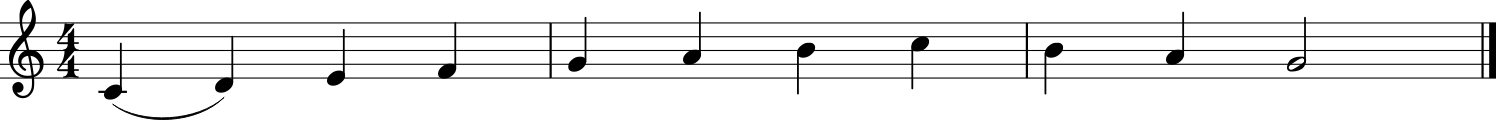

In [4]:
m1 = p.getElementsByClass('Measure')[0]
m1.insert(0.0, sl1)
p.show()

Ta-da! The slur is present and connects the first two notes.

But the power of the slur is that it can cross barlines.  So let's create another one from the F to the A.

In [5]:
m2 = p.getElementsByClass('Measure')[1]
f = m1.notes[-1]
g = m2.notes[0]
a = m2.notes[1]
sl2 = spanner.Slur([f, g, a])

Now we have a bit of a dilemma -- where to put this second slur?  Does it go in the measure of the first note? The measure of the last note? The part?  The answer is actually that it can go in any of these! It's just a question of where you want to find it later.  We'll put it in the Part:

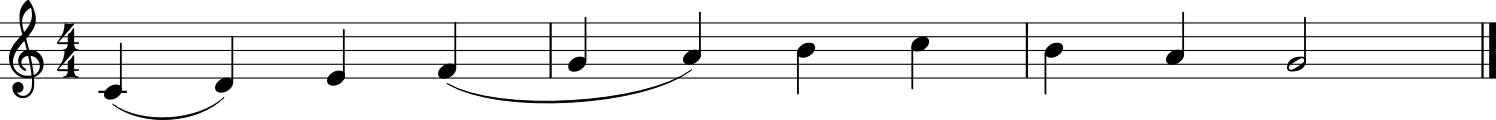

In [6]:
p.insert(0.0, sl2)
p.show()

Depending on what you want to use the spanner for, you might not need to include all the intermediary notes in a spanner.  For instance, let's slur the last four notes on the piece, specifying only the high C and the final G.  We'll put in the last measure.

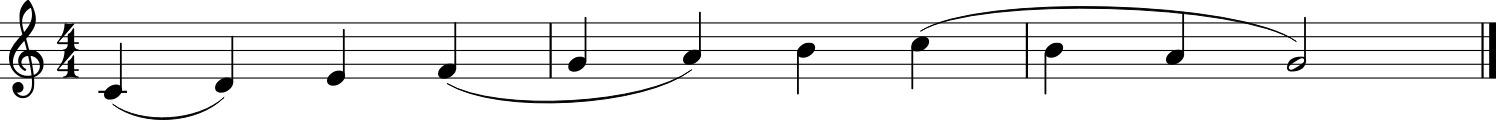

In [7]:
m3 = p.getElementsByClass('Measure')[2]
c2 = m2.notes[-1]
g2 = m3.notes[-1]
sl3 = spanner.Slur([c2, g2])
m2.insert(0, sl3)
p.show()

For any spanner, such as a slur, we can see which elements are contained in it with `.getSpannedElements`

In [8]:
sl1.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note D>]

In [9]:
sl2.getSpannedElements()

[<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>]

Note that since the last slur only had the start and end notes specified, it doesn't report the B or A as "in" the slur:

In [10]:
sl3.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note G>]

This could be thought of as a feature in some ways:

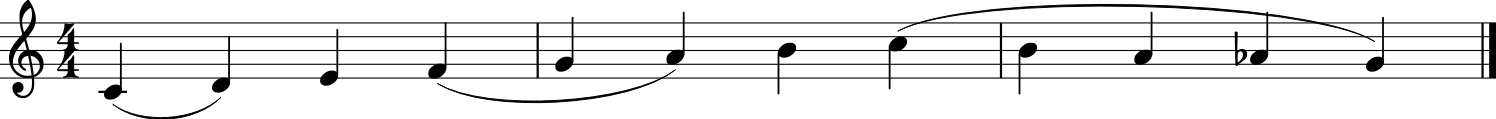

In [11]:
g2.duration.type = 'quarter'
g2.setOffsetBySite(m3, 4.0) # move to last quarter note
aflat = note.Note('A-4')
m3.insert(3.0, aflat)
p.show()

## Spanners in Streams

As far as a Stream is concerned, a spanner is just another element.  So when iterating through a stream, it will appear:

In [12]:
for el in m1:
    print(el)

<music21.clef.TrebleClef>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>


Remember that we chose to put the second slur in the part, so only the first slur appeared.

There's also a shortcut for getting all the spanners in a stream, the `.spanners` property:

In [13]:
list(m1.spanners)

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [14]:
for sp in p.recurse().spanners:
    print(sp)

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note G>>


## Querying spanners

Spanners can tell us a lot of information about their contents.  For instance, the number of elements spanned:

In [15]:
len(sl1)

2

In [16]:
len(sl2)

3

They can find the first and last element:

In [17]:
sl2.getFirst()

<music21.note.Note F>

In [18]:
sl2.getLast()

<music21.note.Note A>

And they can tell if something `.isFirst()` or `.isLast()`

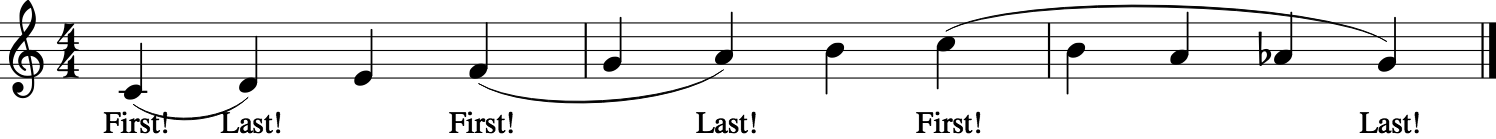

In [19]:
for el in p.recurse():
    for sp in [sl1, sl2, sl3]:
        if sp.isFirst(el):
            el.lyric = 'First!'
        elif sp.isLast(el):
            el.lyric = 'Last!'
p.show()

We can also tell if any element is in a particular spanner:

In [20]:
f in sl2

True

In [21]:
g in sl2

True

In [22]:
f in sl1

False

## Getting spanners from Music21Objects

Each element in a stream can also report what spanners are attached to it:

In [23]:
c.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [24]:
e = p.recurse().notes[2]
e.getSpannerSites()

[]

This method returns a list because it is possible for an object to be a part of more than one spanner.  For instance:

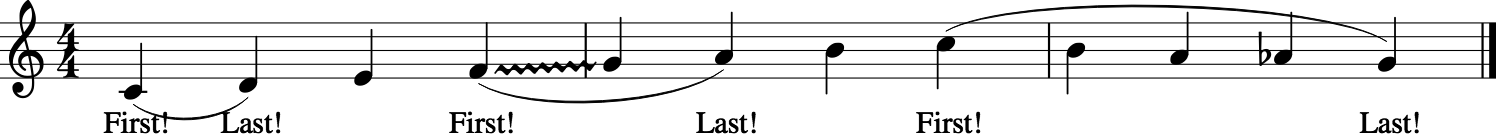

In [25]:
gliss = spanner.Glissando([f, g])
p.insert(0, gliss)
p.show()

In [26]:
g.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>,
 <music21.spanner.Glissando <music21.note.Note F><music21.note.Note G>>]

## Manipulating spanners

Spanners can add elements such as notes to them.  Let's put the e into the first slur:

In [27]:
sl1.addSpannedElements(e)
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D><music21.note.Note E>>

However, note that if we wanted to add the elements in the last slur, we can't just use `.addSpannedElements`, because it's important that G remains last.  But we can take advantage of the fact that Spanners store a Stream and just manipulate that Stream directly.  It is called `.spannerStorage`:

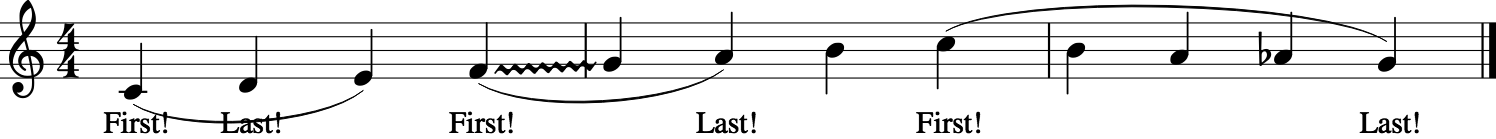

In [28]:
b2 = p.recurse().notes[-4]
a2 = p.recurse().notes[-3]

sl3.spannerStorage.elements = [c2, b2, a2, aflat, g2]
p.show()

Looks the same, but now sl3 contains the notes:

In [29]:
[n for n in sl3]

[<music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note A->,
 <music21.note.Note G>]

## Changing the look of spanners

There are many types of spanners, each with its own properties. (As Audrey Hepburn in _Roman Holiday_ might say, "Each is unforgettable in its own way...") It's worth looking at :ref:`moduleSpanner` to see what each type can configure, but here are some ideas.

Slurs can be placed above or below:

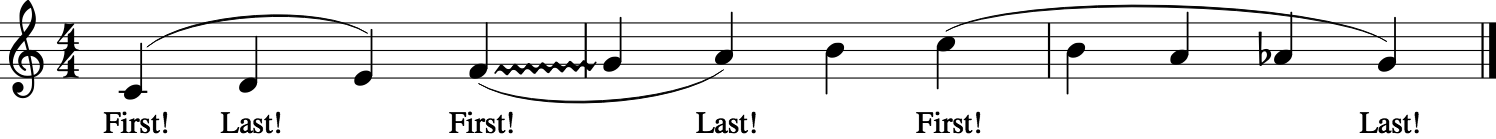

In [30]:
sl1.placement = 'above'
p.show()

Slurs also can configure whether they are solid or dashed, though this does not currently render in MuseScore.

Glissandos have labels:

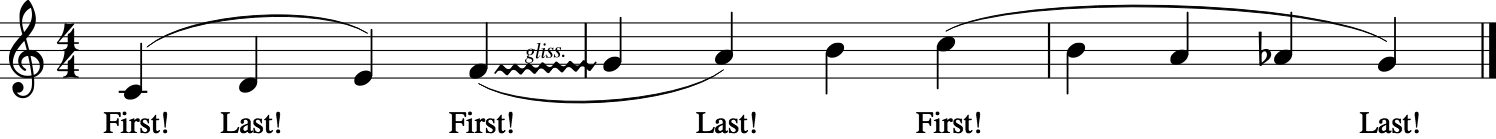

In [31]:
gliss.label = 'gliss.'
p.show()

Crescendo and Diminuendo wedges are also spanners, though they live in the :ref:`moduleDynamics` module, and have a `.spread` property:

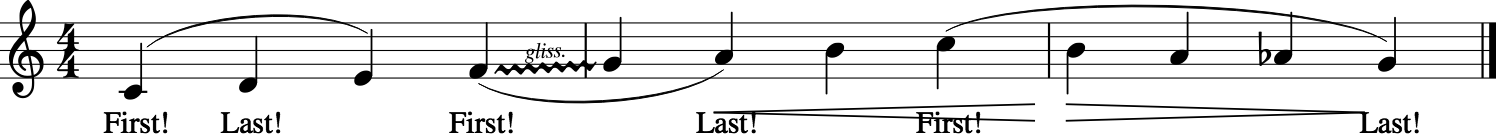

In [32]:
b = p.measure(2).notes[3]

cresc = dynamics.Crescendo([a, b, c2])
cresc.spread = 20

dim = dynamics.Diminuendo([b2, a2, aflat])
dim.spread = 10

p.insert(0.0, cresc)
p.insert(0.0, dim)

p.show()

MuseScore does not import the spread value, but Finale does, so look for it there.  It is measured in tenths of a staff line. `Music21` also supports a `.niente` value for fading to nothingness, but the MusicXML renderers we know of don't support it.

In [38]:
dim.niente = True

Well, I'm fading to nothingness myself, so it's time to move on.  We've done nine more chapters, so it's time to work through examples again, in :ref:`Chapter 30: Examples 3<usersGuide_30_examples3>`.